In [114]:
import numpy as np
import pandas as pd
#pip install seaborn 
import seaborn as sns
%matplotlib inline
import math

In [115]:
df = pd.read_csv("Data/LoanStats3a_securev1.csv",skiprows=1)
#if more than 50% values in an observation is NAN drop that observation
half_count = len(df.columns) / 2
df=df.dropna(axis='columns', how='all')

df = df.dropna(thresh=half_count)


C:\Users\Vasanti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
df.ix[:5,:7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%


In [117]:
#work on every feature slice-by-slice which one's are informative. We would drop some useless attributes and clean-up/modify others.
# .ix[row slice, column slice]
#df.ix[:4,:7]

# We won't need id or member_id as it has no real predictive power so we can drop them from this table
df=df.drop(['id','member_id'],1)

# drop the record if loan_amnt, funded_amnt is missing
df.loan_amnt=df.loan_amnt.dropna()
df.funded_amnt=df.funded_amnt.dropna()

# if the funded_amnt_inv is missing replace it with 
df.funded_amnt_inv=df.funded_amnt_inv.fillna(0)


In [118]:

#int_rate was loaded as an object data type instead of float due to the '%' character. Let's strip that out and convert the column type.
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

#replace missing values for Interest Rate with mean value
df.int_rate=df.int_rate.fillna(float(df.int_rate.mean()))


In [119]:

#term was loaded as an object data type instead of int due to the ' months' character. Let's strip that out and convert the column type.
df.term=pd.Series(df.term).str.replace(' months', '')

#replace missing values for Term with max value
df.term=df.term.fillna(int(df['term'].value_counts().idxmax()))

In [120]:
df.ix[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
1,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off
3,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid
4,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid


In [121]:
#get the total number of value and unique values, total values are 42538 and unique values are 30660
df.emp_title.shape
df.emp_title.unique().shape

#replace missing values for emp_title with Not available
df.emp_title=df.emp_title.fillna("Not available")

In [122]:

#replacing missing values with 0
df.emp_length.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)

#convert categorical value into numerical value
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [123]:
#replace missing values for verification_status with Not verified
df.verification_status=df.verification_status.fillna("Not verified")

In [124]:
#replace missing values for home_ownership with max value
df.home_ownership=df.home_ownership.fillna("OTHER")

# drop the record if the annual_inc value is missing 
df.annual_inc=df.annual_inc.dropna()

#replace missing values for issue_d with Not available
df.issue_d=df.issue_d.fillna("Not available")

#replace missing values for loan_status with Not available
df.loan_status=df.loan_status.fillna("Not available")

In [125]:
df.ix[:5,15:21]


,pymnt_plan,url,desc,purpose,title,zip_code
1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx
3,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx
4,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx


In [126]:
#these four fields would not provide any important informaation thus we are dropping them
df.drop(['pymnt_plan','url','desc','title','zip_code' ],1, inplace=True)

In [127]:

print(df.purpose.value_counts())

#replace missing values for loan_status with Not available
df.purpose=df.purpose.fillna("Not available")

debt_consolidation    15507
credit_card            4148
other                  3495
home_improvement       2494
major_purchase         1766
small_business         1509
car                    1197
wedding                 806
medical                 579
moving                  460
educational             373
house                   341
vacation                288
renewable_energy         78
Name: purpose, dtype: int64


In [128]:
df.ix[:5,17:25]

,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record
1,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN
3,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN
4,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN


In [129]:
#replace missing values for loan_status with Not available
df.addr_state=df.addr_state.fillna("Not available")

In [130]:
#replace missing values for loan_status with Not available
df.delinq_2yrs=df.delinq_2yrs.fillna(0)

In [18]:


#from datetime import datetime

#df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

#dttoday = datetime.now().strftime('%Y-%m-%d')
# There is a better way to do this :) 
#df.earliest_cr_line = df.earliest_cr_line.apply(lambda x: (
 #       np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

#df.earliest_cr_line"""



In [131]:
# drop the record if the fico_range_high and fico_range_low value is missing 
df.fico_range_low=df.fico_range_low.dropna()
df.fico_range_high=df.fico_range_high.dropna()


#FICO fico_range_low & fico_range_high scores on their own aren't as useful as a range thus we are considering its average
df['fico_range'] = df.fico_range_low.astype('str') + '-' + df.fico_range_high.astype('str')
df['meanfico'] = (df.fico_range_low + df.fico_range_high)/2
# drop the features that are not relevant
df.drop(['fico_range_low','fico_range_high','initial_list_status', 'mths_since_last_delinq','mths_since_last_record','pub_rec','open_acc'],1, inplace=True)


In [132]:
#replace missing values for inq_last_6mths with 0
df.inq_last_6mths=df.inq_last_6mths.fillna(0)

df.ix[:10,17:25]

,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp
1,1.00,0.0,Apr-1999,5.0,1687.0,9.4%,4.0,0.0
3,20.00,0.0,Feb-1996,1.0,5598.0,21%,37.0,0.0
4,17.94,0.0,Jan-1996,0.0,27783.0,53.9%,38.0,0.0
6,23.51,0.0,Jul-2005,1.0,17726.0,85.6%,11.0,0.0
7,5.35,0.0,Jan-2007,2.0,8221.0,87.5%,4.0,0.0
9,18.08,0.0,Sep-2004,0.0,9279.0,36.5%,3.0,0.0
10,16.12,0.0,Jan-1998,2.0,4032.0,20.6%,23.0,0.0


In [21]:
#dti and open_acc is yet to be taken care @@@@

In [133]:
df.ix[:10,25:35]

,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
1,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.90,1.11,Apr-2013,119.66
3,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48
4,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.00,0.00,Jan-2017,67.30
6,0.0,10137.840008,10137.84,7000.00,3137.84,0.00,0.00,0.00,May-2016,1313.76
7,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-2015,111.34
9,0.0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-2012,121.45
10,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-2013,1655.54


In [134]:
#replace missing values for revol_bal with 0
df.revol_bal=df.revol_bal.fillna(0)

#replace missing values for revol_util with 0
df.revol_util=df.revol_util.fillna(0)

#replace missing values for total_acc with 0
df.total_acc=df.total_acc.fillna(0)


#revol_util was loaded as an object data type instead of float due to the '%' character. Let's strip that out and convert the column type.
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)



In [135]:
#on checking the value count we see that majority portion of data is inclined towards one value thus these columns do not provide any relevant information, thus we are dropping the columns

print(df.out_prncp_inv.value_counts())
print(df.out_prncp.value_counts())

df.drop(['out_prncp_inv','out_prncp'],1, inplace=True)

0.0       33040
1382.7        1
Name: out_prncp_inv, dtype: int64
0.00       33040
1384.03        1
Name: out_prncp, dtype: int64


In [136]:
#total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee are not relevant in calculating the interest rate of the user, thus dropping them

df.drop(['total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','next_pymnt_d','last_credit_pull_d'],1, inplace=True)


In [137]:
df.ix[:5,25:45]

       loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment  \
1         2500.0       2500.0      2500.000000   60     15.27        59.83   
3        10000.0      10000.0     10000.000000   36     13.49       339.31   
4         3000.0       3000.0      3000.000000   60     12.69        67.79   
6         7000.0       7000.0      7000.000000   60     15.96       170.08   
7         3000.0       3000.0      3000.000000   36     18.64       109.43   
9         5375.0       5375.0      5350.000000   60     12.69       121.45   
10        6500.0       6500.0      6500.000000   60     14.65       153.45   
12        9000.0       9000.0      9000.000000   36     13.49       305.38   
13        3000.0       3000.0      3000.000000   36      9.91        96.68   
16       10000.0      10000.0     10000.000000   36     15.27       347.98   
17        3600.0       3600.0      3600.000000   36      6.03       109.57   
18        6000.0       6000.0      6000.000000   36     11.71   

In [138]:
#calculating the last mean fico score
df['last_fico_range'] = df.last_fico_range_low.astype('str') + '-' + df.last_fico_range_high.astype('str')
df['last_meanfico'] = (df.last_fico_range_low + df.last_fico_range_high)/2
df.drop(['last_fico_range_high','last_fico_range_low','policy_code'],1, inplace=True)

In [139]:
#since the value count indicate majority of the data has just one value, we are dropping the column
print(df.collections_12_mths_ex_med.value_counts())
print(df.application_type.value_counts())
print(df.acc_now_delinq.value_counts())
print(df.chargeoff_within_12_mths.value_counts())
print(df.delinq_amnt.value_counts())
print(df.pub_rec_bankruptcies.value_counts())
print(df.tax_liens.value_counts())

df.drop(['acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','application_type','collections_12_mths_ex_med'],1, inplace=True)
#since the highest and lowest fico score is already considered, we can drop this field
df.drop(['fico_range', 'last_fico_range'],1, inplace=True)


0.0    33019
Name: collections_12_mths_ex_med, dtype: int64
INDIVIDUAL    33041
Name: application_type, dtype: int64
0.0    33038
1.0        3
Name: acc_now_delinq, dtype: int64
0.0    33019
Name: chargeoff_within_12_mths, dtype: int64
0.0     33040
27.0        1
Name: delinq_amnt, dtype: int64
0.0    29989
1.0     1803
2.0        8
Name: pub_rec_bankruptcies, dtype: int64
0.0    33040
1.0        1
Name: tax_liens, dtype: int64


In [141]:
#after carefully examining each field we have shortlisted 38 features listed below

print(df.columns)
df.head(5)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'meanfico',
       'last_meanfico'],
      dtype='object')


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,meanfico,last_meanfico
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,1,...,0.0,Apr-1999,5.0,1687.0,9.4,4.0,Apr-2013,119.66,742.0,249.5
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,0.0,Feb-1996,1.0,5598.0,21.0,37.0,Jan-2015,357.48,692.0,602.0
4,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,...,0.0,Jan-1996,0.0,27783.0,53.9,38.0,Jan-2017,67.30,697.0,692.0
6,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,0.0,Jul-2005,1.0,17726.0,85.6,11.0,May-2016,1313.76,692.0,652.0
7,3000.0,3000.0,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,0.0,Jan-2007,2.0,8221.0,87.5,4.0,Jan-2015,111.34,662.0,687.0


In [142]:
#alter the dtypes of the column
df.loan_amnt  =df.loan_amnt.astype(int)
df.funded_amnt  =df.funded_amnt.astype(int)
df.annual_inc  =df.annual_inc.astype(int)
df.delinq_2yrs  =df.delinq_2yrs.astype(int)
df.inq_last_6mths  =df.inq_last_6mths.astype(int)
df.revol_bal  =df.revol_bal.astype(int)
df.total_acc  =df.total_acc.astype(int)
df.meanfico  =df.meanfico.astype(int)
df.last_meanfico  =df.last_meanfico.astype(int)
  
#math.ceil(i*100)/100
ceil_function= lambda x: math.ceil(x*100)/100
df['funded_amnt_inv']=df['funded_amnt_inv'].apply(ceil_function)


In [143]:

from sklearn.preprocessing import LabelEncoder
#using label encoder to convert categorical columns into numeric values
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            #try:
                df[feature] = le.fit_transform(df[feature])
            #except:
             #   print('Error encoding '+feature)
        return df

In [146]:

cols = df.columns
#getting the list of features that are numeric
num_cols_list = df._get_numeric_data().columns

#getting the list of features that are categorical
cat_cols_list=list(set(cols) - set(num_cols_list))
#print(df[cat_cols_list])

#print("Next one")
#print(df[num_cols_list])
#X=df[num_cols_list].ix[:, df[num_cols_list].columns != 'int_rate']


df[cat_cols_list]=dummyEncode(df[cat_cols_list])



X=df.ix[:, df.columns != 'int_rate']
Y=df.int_rate

X=X.as_matrix()
Y=Y.as_matrix()

#Describe each features distribution  @@@ uncomment this later
#print(df.describe())

#Compute the corelation between the features to determine the relationship between all the features
correlations = df.corr(method='pearson')
#print(correlations.ix[4:5,25:35])

new_df= pd.read_csv("Data/LoanStats3a_securev1.csv",skiprows=1)
new_df=new_df.dropna(axis='columns', how='all')
new_df = new_df.dropna()
new_df=dummyEncode(new_df)

correlations2 = new_df.corr(method='pearson')
correlations2.ix[6:7,59:65]



C:\Users\Vasanti\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TypeError: unorderable types: str() > float()

In [33]:
print(df.loan_status    .dtypes)
print(new_df.loan_status    .dtypes)

print(df.loan_status    .head(5))
print(new_df.loan_status    .head(5))

int64
int64
1    0
3    1
4    1
6    1
7    1
Name: loan_status, dtype: int64
39838    1
39840    1
39865    0
39871    1
39876    0
Name: loan_status, dtype: int64


In [34]:
# #@@@not working

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# feature_test = SelectKBest(score_func=chi2, k=4)

# fit = feature_test.fit(X, Y)

# print("Selected Features: %s") % fit.support_

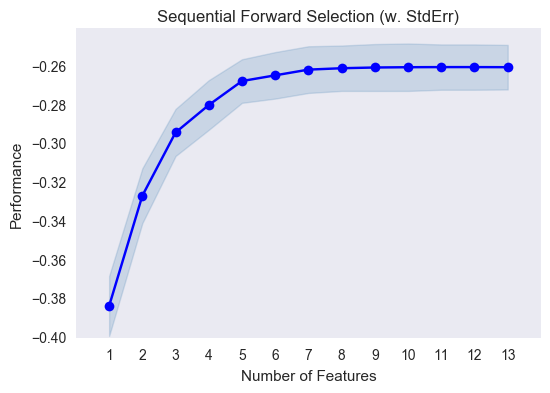

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=4)
lr = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, Y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()



In [148]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#Funded_amt_inv
#Term
#Grade
#Subgrade
#Dti
#Delinq_2_yrs
#Total_payment_inv
#Total_rec_int


# new_df= pd.read_csv("Data/LoanStats3a_securev1.csv",skiprows=1)
# new_df=new_df.dropna(axis='columns', how='all')
# new_df = new_df.dropna()
# new_df=dummyEncode(new_df)

#Y_train=df.int_rate
my_list=['loan_amnt','funded_amnt_inv','term','grade','sub_grade','verification_status','revol_util']

#X_train=df
#random split method for creating the training and test splits
X_train, X_test, Y_train, Y_test = train_test_split(df.ix[:, df.columns != 'int_rate'], df.int_rate, test_size=0.2, random_state=0)

print(len(df))
print(len(Y_train))

print(len(X_test))
print(len(Y_test))

10000
8000
2000
2000


In [149]:
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation

print("Starting Linear Regression algorithm")
linear_reg = LinearRegression()
fit=linear_reg.fit(X_train, Y_train)

print ("Intercept is ",linear_reg.intercept_)
print("Coefficient is ",linear_reg.coef_)
#print(lm.predict([18,3,0,4]))
print("Training score is ",linear_reg.score(X_train, Y_train))

#np.mean((linear_reg.predict(X_test)-Y_test)**2)
print("Testing score is ",linear_reg.score(X_test, Y_test))

train_scores = cross_val_score(fit, df.ix[:, df.columns != 'int_rate'], df.int_rate, cv=10)
print(train_scores)

#Simple K-Fold cross validation. 10 folds.
print(X_train.shape)
cv = cross_validation.KFold(len(X_train), n_folds=10)

results = []


# X_train=X_train.as_matrix()
# Y_train=Y_train.as_matrix()

# "Error_function" can be replaced by the error function of your analysis
for traincv, testcv in cv:
        print(X_train[800])
        probas = linear_reg.fit(X_train[traincv], Y_train[traincv])
        #results.append( Error_function )
        
print ("Results: " + str( np.array(probas).mean() ))



Starting Linear Regression algorithm


ValueError: could not convert string to float: 'Feb-2015'